Association Rules dengan menggunakan MLxtend

### Contoh 1

Membuat dataset yang berisi list kemungkinan pembelian barang yang dibeli dalam satu transaksi. Contohnya, seseorang dalam 1 transaksinya membeli Roti, Selai, dan Mentega. Nah, kombinasi produk pada beberapa transaksi seterusnya akan kita buat dalam dataset berikut!

In [1]:
#buat dataset dalam bentuk list
dataset = [['Roti', 'Selai', 'Mentega'],
          ['Roti', 'Mentega'],
          ['Roti', 'Susu', 'Mentega'],
          ['Coklat', 'Roti'],
          ['Coklat', 'Susu']]

Dengan menggunakan "Association Rules", lihat hubungan asosiasi antar item produk, seperti seberapa besar kemungkinannya produk-produk tertentu akan dibeli bersamaan (dalam 1 transaksi).

In [2]:
#Menggunakan MLxtend preprocessing untuk meng-encode Dataset menjadi One Hot Encoding

from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)

Untuk dataset yang kita encode. Berikut sedikit penjelasannya.

Dataset akan disesuaikan antara item dan transaksi, dimana akan terlihat suatu item berada di transaksi mana saja bersama dengan produk apa saja dalam sebuah transaksi. 

In [3]:
te_array

array([[False,  True,  True,  True, False],
       [False,  True,  True, False, False],
       [False,  True,  True, False,  True],
       [ True, False,  True, False, False],
       [ True, False, False, False,  True]])

Agar bisa lebih bermakna, maka kita akan transformasikan ke dalam bentuk dataframe

In [4]:
#ubah ke dataframe
df = pd.DataFrame(te_array, columns=te.columns_)

Bila kita ibaratkan dalam bentuk tabel asosiasi, maka jumlah kolom akan tersedia menurut item apa saja yang ada dalam dataset. Sedangkan jumlah baris menggambarkan setiap transaksinya.

In [5]:
df

,Coklat,Mentega,Roti,Selai,Susu
0,False,True,True,True,False
1,False,True,True,False,False
2,False,True,True,False,True
3,True,False,True,False,False
4,True,False,False,False,True


Selanjutnya, kita akan mencari nilai-nilai besaran yang sering dijadikan acuan untuk mengetahui besar tingkat hubungan (asosiasi) antar item.

In [6]:
#menggunakan apriori untuk mencari nilai support dan confidence
from mlxtend.frequent_patterns import apriori, association_rules

#nilai min_support biasanya disesuaikan/ditentukan
frekuensi_itemset = apriori(df,min_support=0.3, use_colnames=True)

Pilih salah satu mau pakai "confidence" atau "lift" sebagai penentunya

In [7]:
#nilai min_threshold biasanya disesuaikan/ditentukan
aturan_asosiasi = association_rules(frekuensi_itemset, metric= 'confidence', min_threshold=0.6)
aturan_asosiasi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Mentega),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Mentega),(Roti),0.6,0.8,0.6,1.00,1.25,0.12,inf


In [8]:
#nilai min_threshold biasanya disesuaikan/ditentukan
aturan_asosiasi2 = association_rules(frekuensi_itemset, metric= 'lift', min_threshold=1)
aturan_asosiasi2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Mentega),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Mentega),(Roti),0.6,0.8,0.6,1.00,1.25,0.12,inf


### Contoh 2

Sama dengan dataset pertama, dataset ini juga merupakan kombinasi item yang berada dalam satu transaksi

In [9]:
dataset2  =[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice Cream', 'Eggs']]

Selanjutnya kita encode menjadi One Hot Encoding. 
Lalu transform ke dataframe

In [10]:
te2 = TransactionEncoder()
te_array2 = te2.fit(dataset2).transform(dataset2)
data = pd.DataFrame(te_array2, columns=te2.columns_)
data

,Apple,Corn,Dill,Eggs,Ice Cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


Kita coba menggunakan "confidence"

In [11]:
data_rules = association_rules(apriori(data,min_support=0.6,use_colnames=True),
                  metric= 'confidence', 
                  min_threshold=0.8)

Berikut bila kita coba cek tipe dan isi dari "antecedents" yang kita hasilkan setelah penyesuaian. Ini adalah salah satu atribut yang dipakai untuk memperlihatkan ketersediaan hubungan kombinasi antar item serta keterkaitannya terhadap item lain tersebut pada setiap transaksi, untuk nilai minimal tertentu (misal: min_support).

In [12]:
type(data_rules['antecedents'].iloc[0])

frozenset

In [13]:
data_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


Disini terlihat informasi untuk keterkaitannya, seperti besaran support, dll.

## Latihan

Buatlah sebuah fungsi rekomendasi barang berdasarkan dataset ke-2 diatas.<br>
Pakai antecendent jadi input, dan consequents jadi output.<br>
Nilai min_support = 0.6 <br>
Fungsi dapat menampung input dari user berupa nama salah satu item. <br>
Lalu output yang dihasilkan adalah consequents dari item (antecedent). <br>
Jangan lupa hasil output diurutkan berdasarkan besar nilai supportnya. <br><br>
Contoh:

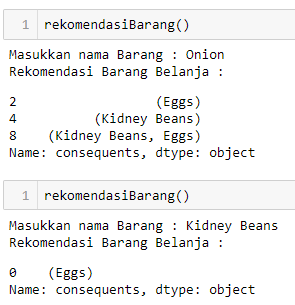
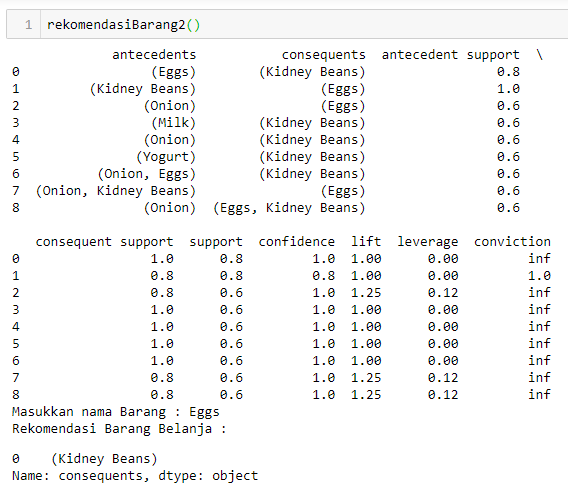

## Jawaban

In [14]:
data_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [15]:
def rekomendasiBarang():
  antecedents_input = input("Masukkan nama Barang : ").split(', ')
  print("Rekomendasi Barang Belanja: ")
  print(data_rules[data_rules['antecedents'] == frozenset(set(antecedents_input))]['consequents'])

In [16]:
rekomendasiBarang()

Masukkan nama Barang : Onion
Rekomendasi Barang Belanja: 
2                  (Eggs)
4          (Kidney Beans)
8    (Eggs, Kidney Beans)
Name: consequents, dtype: object


In [17]:
def rekomendasiBarang2():
  print(data_rules)
  antecedents_input = input("\nMasukkan nama Barang : ").split(', ')
  print("Rekomendasi Barang Belanja: \n")
  print(data_rules[data_rules['antecedents'] == frozenset(set(antecedents_input))]['consequents'])

In [19]:
rekomendasiBarang2()

             antecedents           consequents  ...  leverage  conviction
0                 (Eggs)        (Kidney Beans)  ...      0.00         inf
1         (Kidney Beans)                (Eggs)  ...      0.00         1.0
2                (Onion)                (Eggs)  ...      0.12         inf
3                 (Milk)        (Kidney Beans)  ...      0.00         inf
4                (Onion)        (Kidney Beans)  ...      0.00         inf
5               (Yogurt)        (Kidney Beans)  ...      0.00         inf
6          (Eggs, Onion)        (Kidney Beans)  ...      0.00         inf
7  (Kidney Beans, Onion)                (Eggs)  ...      0.12         inf
8                (Onion)  (Eggs, Kidney Beans)  ...      0.12         inf

[9 rows x 9 columns]

Masukkan nama Barang : Eggs
Rekomendasi Barang Belanja: 

0    (Kidney Beans)
Name: consequents, dtype: object
